# ❓ <font color='green'> <u> PROBLEM STATEMENT (Recommender system_Book_Data) </u>

### 🔵  Build a Book recommender system by using cosine similarity score.

* #### Here we are provided with Books Data and their rating given by users, we have to build a model to recommend the Books to users based on similarities between the users.

___

### ⚫ <u>Introduction:</u>
 - <u><b>Recommendation System<b></u> is a user friendly engine that suggest user the products or services based on his/her previous preferences and similarities between the users.
 - It provide user with many more different options that he/she might be interested but not be aware. 
    - <u><b>Types of Recommendation System:</b></u>
        1. Content Based Recommendation System
        2. Collaborative Filtering : a) User-to-user Based;  b)Product-to-product Based
        3. Hybrid Filtering
    
##### <font color='brown'>➡ Here we are going to build model User-to-user based collaborative filtering for recommending books to Users.
    


***

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='pastel')

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/book.csv', encoding='Latin1', index_col=0)
df

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [3]:
# Renaming the columns:
df.rename(columns={'User.ID':'UserID', 'Book.Title':'Book', 'Book.Rating':'Rating'}, inplace=True)
df.head(0)

,UserID,Book,Rating


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserID  10000 non-null  int64 
 1   Book    10000 non-null  object
 2   Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


> * #### There are 10000 records and 3 Variables.
> * #### "UserID" and "Rating" are integer and "Book" is Object Data Type which are proper.
> * #### Here "UserID" is used as an identity for that user so it is an important variable.

* ##### <font color ='green'> <u>Descriptive statistics</u>

In [6]:
df.describe()

,UserID,Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [7]:
# Mode of "Rating" variable:

import statistics as st
print(f'Mode Value for "Rating" = ',st.mode(df['Rating']) )

Mode Value for "Rating" =  8


In [8]:
# Checking For null Value if any:

df.isna().sum()

UserID    0
Book      0
Rating    0
dtype: int64

> * #### Minimum Value For "Rating" is 1 and Maximum 10. Most frequent rating is 8. 
> * #### No Null Values present in any variable.

* ##### <font color ='green'><u> Checking for Duplicate Records and Removing if any </u>

In [9]:
df.duplicated().sum()

2

In [10]:
# Get all duplicated records:

df[df.duplicated(keep=False)] 

,UserID,Book,Rating
5051,2152,Le nouveau soleil de Teur,7
5052,2152,Le nouveau soleil de Teur,7
7046,3757,The Magician's Tale,7
7440,3757,The Magician's Tale,7


In [11]:
# Drop Duplicated Record:

df.drop_duplicates(inplace= True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(9998, 3)

* ##### <font color ='green'><u> Let's Check For Unique Values </u>

In [14]:
print(f'Unique Values for "UserID" =', df['UserID'].nunique())
print(f'Unique Values for "Book" =', df['Book'].nunique())
print(f'Unique Values for "Rating" =', df['Rating'].nunique())

Unique Values for "UserID" = 2182
Unique Values for "Book" = 9659
Unique Values for "Rating" = 10


> * #### There were two duplicated records present are removed now.
> * #### We have 2182 unique users and 9659 different books data in 9998 records.

***

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <font color ='green'><u> Count plot for "Rating" Variable:</u>

<AxesSubplot:xlabel='Rating', ylabel='count'>

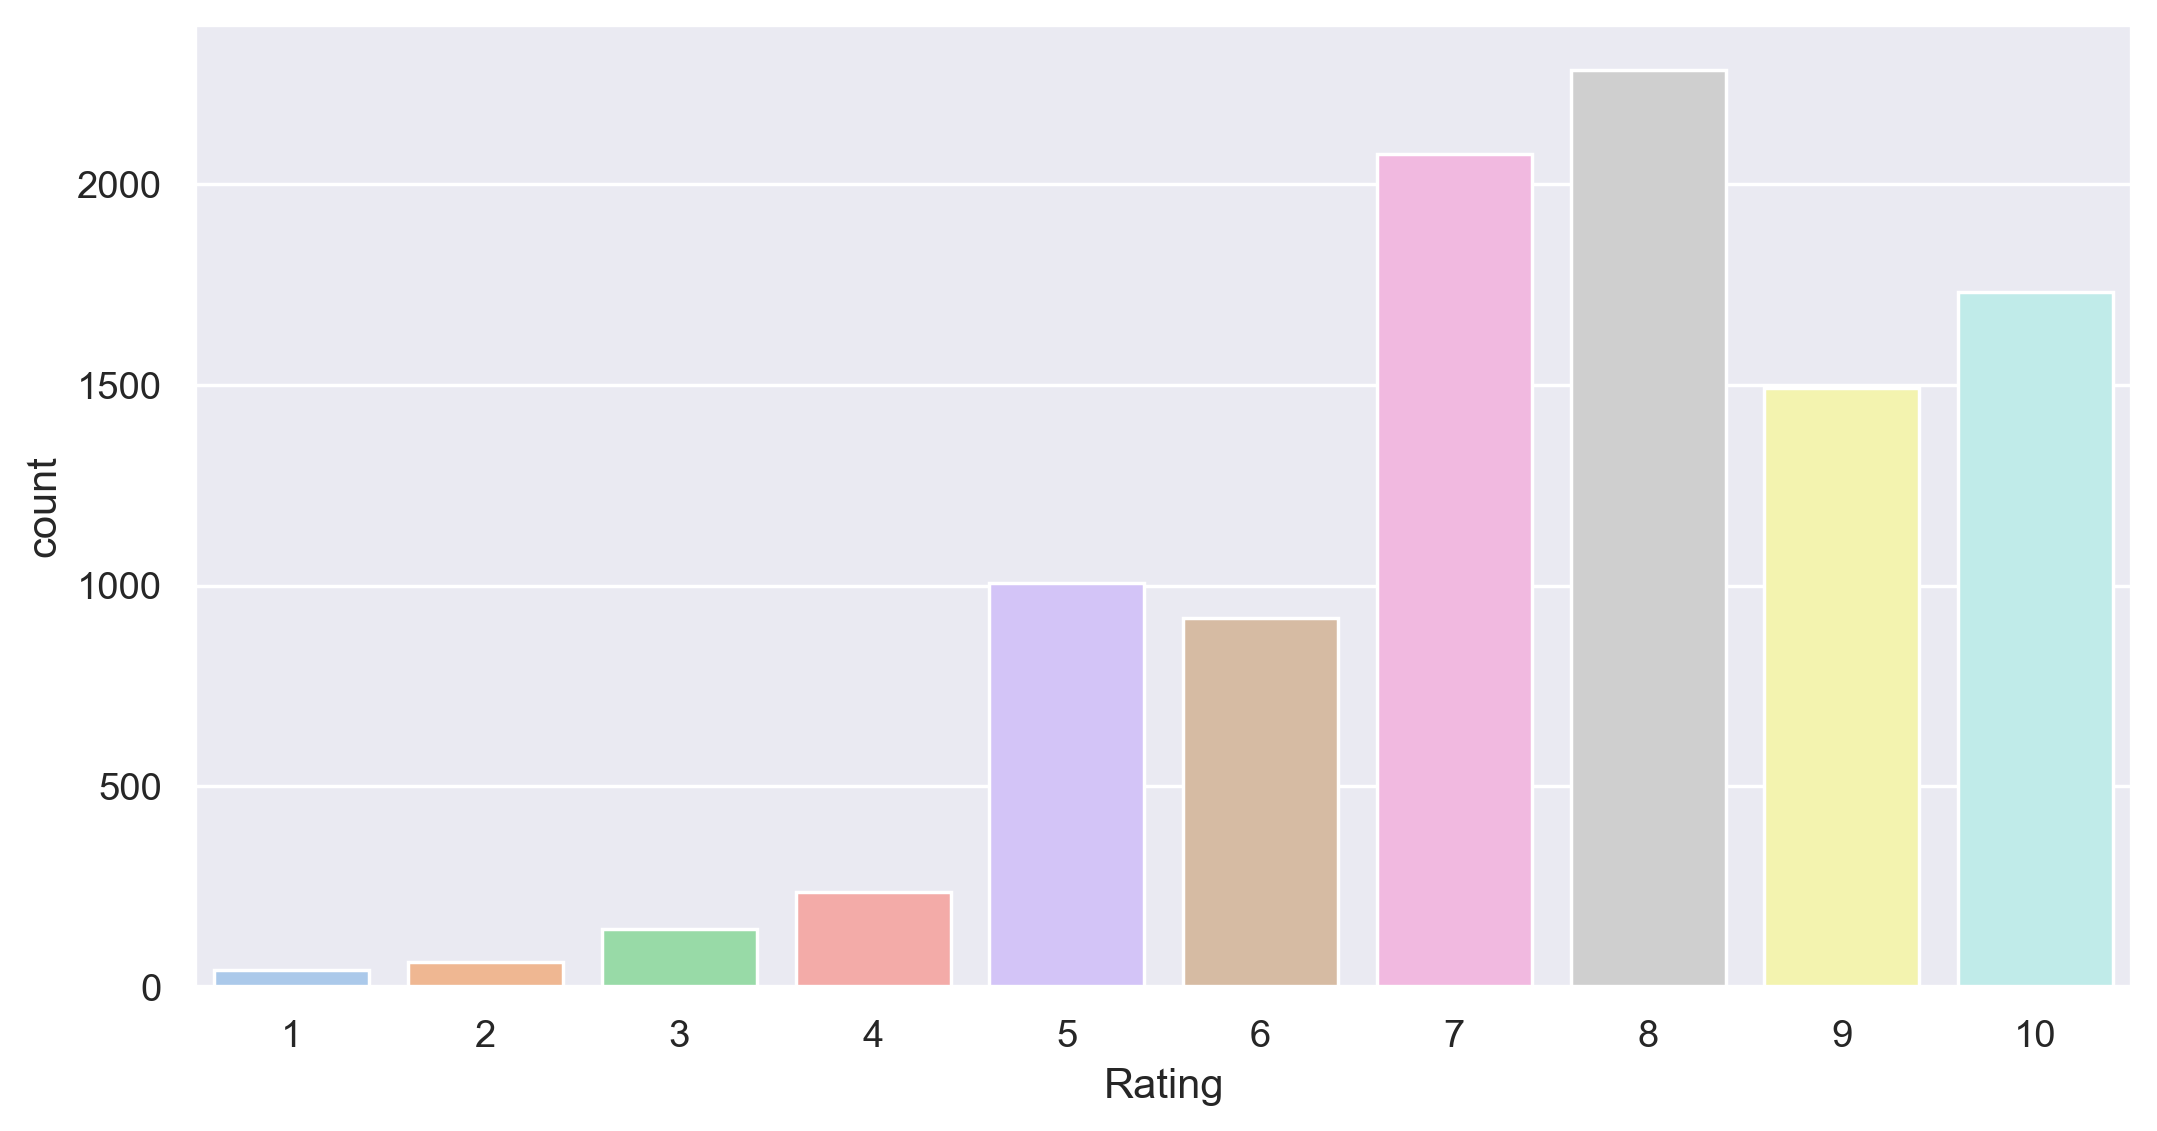

In [15]:
sns.countplot(df['Rating'])

> * #### We see here Ratings 7,8 and 10 given by more than 1500 users. That means more than average rating given by majority of users.

* ##### <font color ='green'><u> Visualisation for percentage wise "Rating" Variable:</u>

<AxesSubplot:title={'center':'Pie-chart for Ratings'}, ylabel='Rating'>

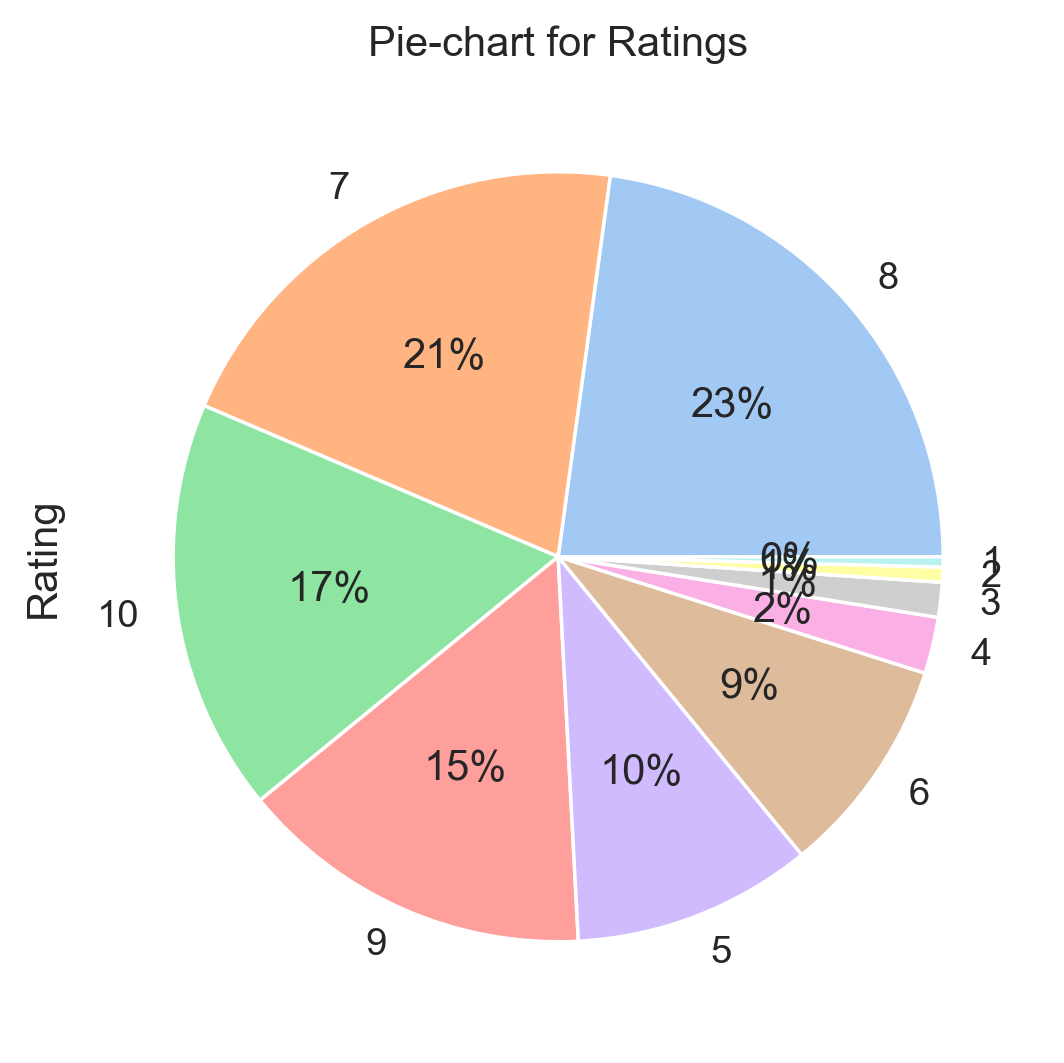

In [16]:
df['Rating'].value_counts().plot(kind = 'pie',autopct = "%0.0f%%", title = 'Pie-chart for Ratings')

> * #### Nearly 75% rating given by users for Books is above the average rating. 

* ##### <font color ='green'><u> Frequently Rated Top 10 Books </u>

<AxesSubplot:title={'center':'Top 10 most frequently brought Books'}>

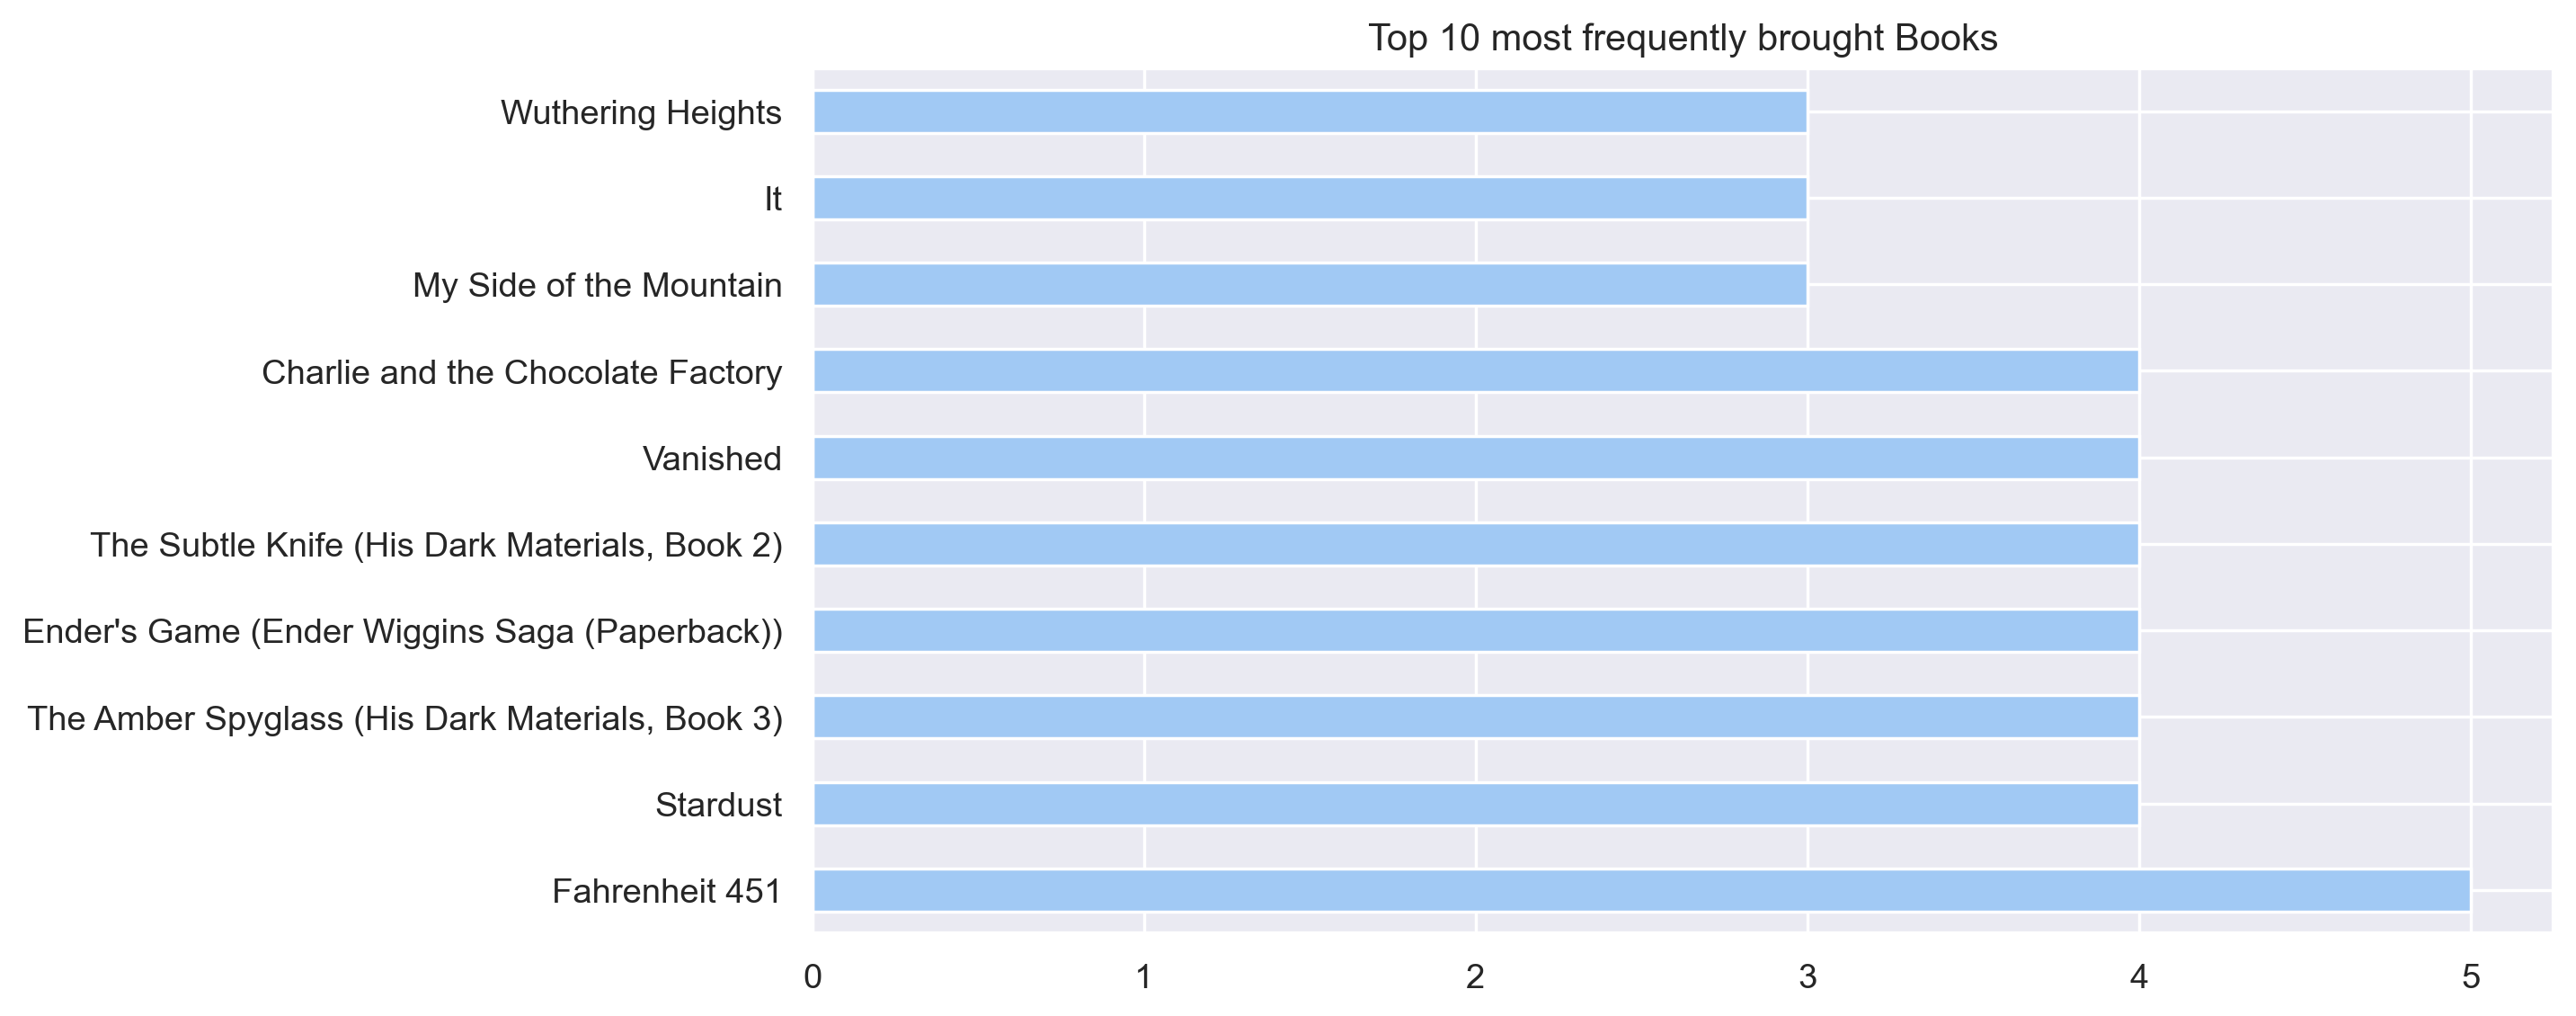

In [17]:
df['Book'].value_counts().head(10).plot(kind='barh', title = 'Top 10 most frequently brought Books')

> * #### This gives how many times the Book is rated. Only one book is rated maximum of 5 times. This means majority of Books not brought frequently.

___

* ### <font color = 'blue'> <u> MODEL BUILDING</u>

* #### <font color ='green'>In User-to-User based collaborative filtering each user represented in p-dimentional vector. So, we arrange Users row-wise and Book titles on columns.

In [18]:
pivot = df.pivot_table( index='UserID', columns = 'Book', values='Rating')
pivot

Book,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


* #### <font color ='green'>Replacing null values with 0 for machine learning.

In [19]:
pivot.fillna(0,inplace=True)
pivot

Book,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


* ##### <font color ='green'> Calculating the distances and similarities between the Users with cosine measure

In [20]:
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(pivot, metric = 'cosine')

In [21]:
# We get output in 2 dimensional array so to visualise convert it into dataframe

pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,2.220446e-16,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2178,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2179,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2180,1.0,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [22]:
# Here we have distances between data-points but we want similarities so we negate the distance value from one 

similarity = 1 - distances
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* ##### <font color ='green'> Similarity of data-point with itself shows 1 i.e similarity with same user is always 100% but these diagonal records going to cofuse our model so we need to convert them into 0.

In [23]:
np.fill_diagonal(similarity, 0)

similarity

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
# Convert similarity into data-frame

similarity = pd.DataFrame(similarity)
similarity

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Change default index number with UserID

similarity.index = df['UserID'].unique()
similarity.columns = df['UserID'].unique()

similarity

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Extracting users who are 100% similar to each other:

similarity.idxmax()

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

* ##### <font color ='green'>Finding out similar users and recommend the Book to them according to Ratings they gave.

In [27]:
df[(df['UserID'] == 161453) | (df['UserID'] == 162113)]

,UserID,Book,Rating
8960,161453,"Bread, Tomato, Garlic: Quick Cooking With 3 Ma...",9
8961,161453,"The Ubiquitous Shrimp: From Simple to Exotic, ...",8
9990,162113,The Cape Ann (Contemporary American Fiction),8


> * #### The Books "Bread, Tomato, Garlic"  and "The Ubiquitous Shrimp" could be recommended to User 162113 cause the similar user 161453 gave higher rating to that book.
> * #### Similarly book "The Cape Ann" could be recommended to User 161453.

In [28]:
df[(df['UserID'] == 276744) | (df['UserID'] == 276726)]

,UserID,Book,Rating
1,276726,Classical Mythology,5
6,276744,The Kitchen God's Wife,7


> * #### The book "The Kitchen God's Wife" with above average rating can be recommended to User 276726.      

In [29]:
df[(df['UserID'] == 276726) | (df['UserID'] == 162121)]

,UserID,Book,Rating
1,276726,Classical Mythology,5
9991,162121,The Cloister Walk,7
9992,162121,Open Water,5
9993,162121,The Evolution of Jane,8
9994,162121,AT PARADISE GATE,8
9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


> * #### The High rated Books by User 162121 could be recommended to User 276726, but the below average rated book should not be recommended to respective similar pair. 

* ### <font color = 'blue'> <u> CONCLUSION </u>
    * #### Recommendation System is Unsupervised Machine Learning. It is also called as lazy learning cause it doesn't learn anything new but only calculate similarities. 
    - #### But the growing e-commerce market, online stores, OTT platforms widens the scope of recommender system. So it gain high importance now a days.  

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___